# Ray Tracing for Tilted Flat Mirrors

This notebook goes through the formulation of the ray-tracing equations used at the LCLS Skywalker project to automate alignment of the Hard X-Ray Offset Mirrors (HOMS) to two points on imagers downstream of the mirrors. Below is a schematic that shows the various mirrors contained in the FEE.

<img src=fee.png>

Of these mirrors only M1H and M2H will be used in the derivation but in principle should be applicable to any flat two mirror system including the soft x-ray offset mirrors. In addition to the mirrors, equations for imagers will be derived as well and are located right before M1H, between M1H and M2H and two after M2H. The coordinate system used in this notebook is shown on the diagram, with the $z$ axis going along the beamline, the $x$ axis running in the horizontal direction parallel to the ground and the $y$ axis running vertically off the ground. For all the calulations made, the small angle approximation ($tan(x) \approx x$) was used as the range of the mirrors is only several microradians from the nominal poisition of 0.00

At a high level the beam, mirrors and imagers can be represented as lines in space, where the point of refelction/contact would just be the intersection point of these lines. Knowing this, one can go through the beamline, component by component and calculate the expected $x$ position, $z$ position and angle of the beam at the component or any point in between. To actually do the derivation, the python package [sympy](http://www.sympy.org/en/index.html) was used. It is a package to perform symbolic mathematics within the python langauge.

We begin by first importing sympy and enabling nice printing.

In [34]:
import sympy as sp
sp.init_printing() 

Start by initializing the symbols pertaining to the beamline components.

In [2]:
dp1hx, dp1hz      = sp.symbols("D^x_P1H D^z_P1H")        # X and Z position at the center of P1H
dm1hx, dm1hz      = sp.symbols("D^x_M1H D^z_M1H")        # X and Z position at the center of M1H
dp2hx, dp2hz      = sp.symbols("D^x_P2H D^z_P2H")        # X and Z position at the center of P2H
dm2hx, dm2hz      = sp.symbols("D^x_M2H D^z_M2H")        # X and Z position at the center of M2H
dp3hx, dp3hz      = sp.symbols("D^x_P3H D^z_P3H")        # X and Z position at the center of P3H
ddg3x, ddg3z      = sp.symbols("D^x_DG3 D^z_DG3")        # X and Z position at the center of DG3
a1, a2            = sp.symbols("alpha_M1H alpha_M2H")    # M1H and M2H angle wrt z-axis

And also the beam at all the various components

In [3]:
x0, xp0           = sp.symbols("x_0 x^'_0")              # X and angle of the beam at the source
xpm1h, xpm2h      = sp.symbols("x^'_M1H x^'_M2H")        # Reflection angle after M1H and M2H
xp1h, zp1h, xpp1h = sp.symbols("x_P1H z_P2H x^'_P1H")    # X, Z and angle of the beam at P1H
xm1h, zm1h, xpm1h = sp.symbols("x_M1H z_M1H x^'_M1H")    # X, Z and angle of the beam at M1H
xp2h, zp2h, xpp2h = sp.symbols("x_P2H z_P2H x^'_P2H")    # X, Z and angle of the beam at P2H
xm2h, zm2h, xpm2h = sp.symbols("x_M2H z_M2H x^'_M2H")    # X, Z and angle of the beam at M2H
xp3h, zp3h, xpp3h = sp.symbols("x_P3H z_P3H x^'_P3H")    # X, Z and angle of the beam at P3H
xdg3, zdg3, xpdg3 = sp.symbols("x_DG3 z_DG3 x^'_DG3")    # X, Z and angle of the beam at DG3

## P1H

In [4]:
# Standard line equation
xp1h = x0 + dp1hx * xp0

# Position in z is just the position of the imager
zp1h = dp1hz

# Angle is the same as the initial angle of the beam
xpp1h = xp0

And then from here we can print the equations we get

In [5]:
# X Position of the beam at P1H
sp.relational.Eq(sp.symbols("x_P1H"), xp1h)

In [6]:
# Z Position of the beam at P1H
sp.relational.Eq(sp.symbols("z_P1H"), zp1h)

In [7]:
# Angle of the beam at P1H
sp.relational.Eq(sp.symbols("x^'_P1H"), xpp1h)

## M1H

To solve for M1H, we can characterize the mirror as being a line with a slope alpha_M1H, and then find the intersection between the beam and this line.

Starting with point slope form, move the terms to one side and then solve using sympy.

In [8]:
# Declare generic x and z variables to solve for
x, z = sp.symbols("x z")

# Using point slope eq for a line to get line of M1H (point is dm1hz, dm1hx)
m1h_ln = a1 * (z - dm1hz) + dm1hx - x

# Solve for x and grab the only element in the returned solution list
m1h_ln_x = sp.solve(m1h_ln, x)[0]

# Use a standard line equation to characterize the beam
beam_ln = x0 + z * xp0

# Setting them equal to each other and move to one side then solve for z
zm1h = sp.solve(m1h_ln_x - beam_ln, z)[0]

# Plugging this z into the eq for the beam line to get x point of intersection then simplifying
xm1h = sp.simplify(x0 + zm1h * xp0)

# Define the new angle of reflection
xpm1h = 2*a1 - xp0

And then to view the resulting equations

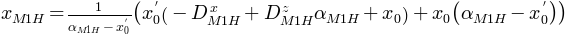

In [9]:
# X Position of the beam at the point of reflection on M1H
sp.relational.Eq(sp.symbols("x_M1H"), xm1h)

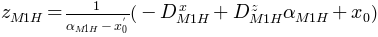

In [10]:
# Z Position of the beam at the point of reflection on M1H
sp.relational.Eq(sp.symbols("z_M1H"), zm1h)

In [11]:
# New angle after reflection off M1H
sp.relational.Eq(sp.symbols("x^'_M1H"), xpm1h)

## P2H

The same method that was applied to get P1H is reapplied here but using the X, Z and angle of the beam from M1H

In [12]:
# X position follows the line eq but using x position at m1h and new angle
xp2h_eq = xm1h + xpm1h * (dp2hz-dm1hz)

# Simplify
xp2h = sp.simplify(xp2h_eq)

# Z position is just the defined z position of the imager
zp2h = dp2hz

# Angle of the beam isn't changing from M1H
xpp2h = xpm1h

And then viewing the results

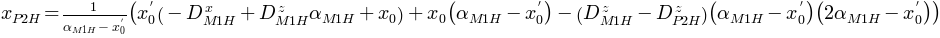

In [13]:
# X Position of the beam as it crosses P2H
sp.relational.Eq(sp.symbols("x_P2H"), xp2h)

In [14]:
# Z Position of the beam is just the z position of the imager
sp.relational.Eq(sp.symbols("z_P2H"), zp2h)

In [15]:
# Angle of the beam is just the reflected angle off M1H
sp.relational.Eq(sp.symbols("x^'_P2H"), xpp2h)

## M2H

When on the second mirror we reapply the same method used for M1H but this time we need to solve for the equation of the beam using the point slope equation in addition to the mirror. The resulting line equations are then set to be equal to find the point of intersection.

In [16]:
# Declare generic x and z variables to solve for
x, z = sp.symbols("x z")

# Using point slope eq for a line to get line of M2H (point is dm2hz, m2hdx)
m2h_ln = a2 * (z - dm2hz) + dm2hx - x

# Solve for x and grab the only element in the solution
m2h_ln_x = sp.solve(m2h_ln, x)[0]

# Get the line eq for the beam using beam parameters from m1h in point slope
beam_ln =  xpm1h*(z - zm1h) + xm1h - x

# Solve for x and grab the only element in the returned solution list
beam_ln_x = sp.solve(beam_ln, x)[0]

# Set them equal to each other and move to one side then solve for z. Grab only resulting solution
zm2h = sp.solve(m2h_ln_x - beam_ln_x, z)[0]

# Substitute z intersection point into the eq for the beam line to get x point of intersection
m2h_sub = beam_ln.subs(z, zm2h)

# Solve for x and grab the only element
xm2h = sp.solve(m2h_sub, x)[0]

# Calculate the new reflection angle
xpm2h = 2*a2 - xpm1h

Let's see the resulting equations

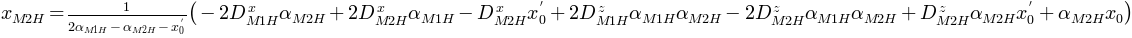

In [17]:
# X Position of the beam at the point of reflection on M2H
sp.relational.Eq(sp.symbols("x_M2H"), xm2h)

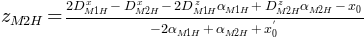

In [18]:
# Z Position of the beam at the point of reflection on M2H
sp.relational.Eq(sp.symbols("z_M2H"), zm2h)

In [19]:
# New angle after reflection off M1H
sp.relational.Eq(sp.symbols("x^'_M2H"), xpm2h)

## P3H

Finding the equations for the beam after M2H is the same as for P2H just using the beam positions at M2H rather than M1H. From there the equation is just a difference of how far away you are in z.

In [20]:
# X position follows the line eq but using x position at m2h and new angle
xp3h_eq = xm2h + xpm2h*(dp3hz-dm2hz)

# Simplify
xp3h = sp.simplify(xp3h_eq)

# Z position is just the defined z position of the imager
zp3h = dp3hz

# Angle doesn't change
xpp3h = xpm2h

Printing the resulting equations we get

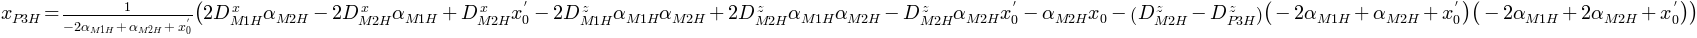

In [21]:
# X Position of the beam at P3H
sp.relational.Eq(sp.symbols("x_P3H"), xp3h)

In [22]:
# Z Position of the beam is just the z position of the imager
sp.relational.Eq(sp.symbols("z_P3H"), zp3h)

In [23]:
# Angle of the beam is just the reflected angle off M2H
sp.relational.Eq(sp.symbols("x^'_P3H"), xpp3h)

## DG3

The method and resulting equations for DG3 are identical to P3H just substituted with the positions of DG3.

In [24]:
# X position follows the line eq but using x position at m2h and new angle
xdg3_eq = xm2h + xpm2h*(ddg3z-dm2hz)

# Simplify
xdg3 = sp.simplify(xdg3_eq)

# Z position is just the defined z position of the imager
zdg3 = ddg3z

# Angle doesn't change
xpdg3 = xpm2h

And the final resulting equations

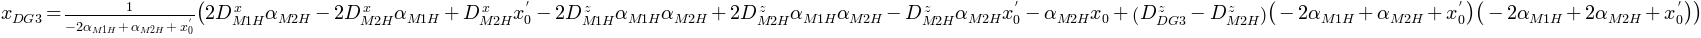

In [25]:
# X Position of the beam at DG3
sp.relational.Eq(sp.symbols("x_DG3"), xdg3)

In [26]:
# Z Position of the beam is just the z position of the imager
sp.relational.Eq(sp.symbols("z_DG3"), zdg3)

In [27]:
# Angle of the beam is just the reflected angle off M2H
sp.relational.Eq(sp.symbols("x^'_DG3"), xpdg3)

# Walking the Beam

Being able to fully characterize the beam at all points on the beamline, we can use them to apply the iterative beam walking algorithm (shown [here](http://laser.physics.sunysb.edu/~simone/mini-project/) and [here](https://virtualetters.blogspot.com/2012/07/walking-beam.html)) by solving the equations above for the mirror angles at the respective imagers. The algorithm calls for aligning the angle of the first mirror with respect to the desired point on the first imager and then the angle of the second mirror with respect to the desired point on the second imager. Repeating this sequence should converge to mirror angles that hit (or minimize the error) the desired two points.

So to do this is relatively straight forward. We solve the equation for the X position at P3H for alpha 1, and then solve the equation for the X position at DG3 for alpha 2.

In [28]:
# Declare a generic x position we want to hit
x = sp.symbols("x")

# Move everything to one side and solve p3h x position for alpha 1
p3h_alpha = sp.solve(xp3h - x, a1)

# Move everything to one side and solve dg3 x position for alpha 2
dg3_alpha = sp.solve(xdg3 - x, a2)

Before trying to print these behemoths of solutions it should be noted that there are actually two solutions for each angle.

In [29]:
print("Number of solutions for Alpha 1: {0}, Alpha 2: {1}".format(len(p3h_alpha), len(dg3_alpha)))

Number of solutions for Alpha 1: 2, Alpha 2: 2


This implies the equation was quadratic in terms of alpha and we would need to choose the correct solution of the two. To find the solutions we want, we can evaluate each of the expressions using known inputs to see which ones return the expected outputs.

In this case we can input the positions of all the beamline components at their nominal positions and see which solution also returns the mirror in its nominal position. So first let us see what variables are used in each of the equations.

In [30]:
alpha_1_vars = p3h_alpha[0].free_symbols
alpha_2_vars = dg3_alpha[0].free_symbols

print("Alpha 1 variables: {0}".format(alpha_1_vars))
print("Alpha 2 variables: {0}".format(alpha_2_vars))

Alpha 1 variables: {x, alpha_M2H, x_0, D^z_M2H, D^z_P3H, D^x_M2H, x^'_0, D^x_M1H, D^z_M1H}
Alpha 2 variables: {x, x_0, D^z_M2H, D^z_DG3, D^x_M2H, x^'_0, D^x_M1H, D^z_M1H, alpha_M1H}


Using this, we can build a dictionary containing the mapping from each symbol to their respective value and then pass it into the subs method to evaluate the expression.

In [35]:
# Dictionary of all the relevant inputs
var_dict = {a1:0.0014, a2:0.0014, dp3hz:103.660, dm2hx:0.031732317072726328,
            x:0.031732317072726328, dm1hx:0, x0:0, xp0:0, dm2hz:101.843,
            dm1hz:90.510, ddg3z:375.0, dp2hz:100.828}

print("Solutions for alpha 1:")
for i, sol in enumerate(p3h_alpha):
    val = sol.subs(var_dict)
    print("  Solution {0}: {1}".format(i+1, val))
    
print("\nSolutions for alpha 2:")
for i, sol in enumerate(dg3_alpha):
    val = sol.subs(var_dict)
    print("  Solution {0}: {1}".format(i+1, val))

Solutions for alpha 1:
  Solution 1: 0.00139999684686977
  Solution 2: -0.00366603977477292

Solutions for alpha 2:
  Solution 1: 0.00140000015179419
  Solution 2: 0.00279999969641165


For both setups the expected result is 0.0014 radians so we now know the equations we want are at index 0 for both alpha 1 and alpha 2. 

Actually printing the equations can a be a bit tricky because the equations exceed the default buffer size for mathjax and it has issues rendering a double exponenent. I used [this](https://stackoverflow.com/questions/22751772/mathjax-in-ipython-notebook-fails-for-fairly-large-equations) stackoverflow page to remedy the first part, and for the second I just entered brakets manually before printing them.

So I first printed alpha 1 in latex syntax using the sympy latex function.

In [32]:
print(sp.printing.latex(p3h_alpha[0]))

\frac{1}{4 D^{z}_{M2H} - 4 D^{z}_{P3H}} \left(- D^{x}_{M2H} - D^{z}_{M1H} \alpha_{M2H} + 4 D^{z}_{M2H} \alpha_{M2H} + 2 D^{z}_{M2H} x^{'}_{0} - 3 D^{z}_{P3H} \alpha_{M2H} - 2 D^{z}_{P3H} x^{'}_{0} + x - \sqrt{8 D^{x}_{M1H} D^{z}_{M2H} \alpha_{M2H} - 8 D^{x}_{M1H} D^{z}_{P3H} \alpha_{M2H} + D^{x}_{M2H}^{2} + 2 D^{x}_{M2H} D^{z}_{M1H} \alpha_{M2H} - 8 D^{x}_{M2H} D^{z}_{M2H} \alpha_{M2H} + 6 D^{x}_{M2H} D^{z}_{P3H} \alpha_{M2H} - 2 D^{x}_{M2H} x + D^{z}_{M1H}^{2} \alpha_{M2H}^{2} - 8 D^{z}_{M1H} D^{z}_{M2H} \alpha_{M2H}^{2} - 4 D^{z}_{M1H} D^{z}_{M2H} \alpha_{M2H} x^{'}_{0} + 6 D^{z}_{M1H} D^{z}_{P3H} \alpha_{M2H}^{2} + 4 D^{z}_{M1H} D^{z}_{P3H} \alpha_{M2H} x^{'}_{0} - 2 D^{z}_{M1H} \alpha_{M2H} x + 8 D^{z}_{M2H}^{2} \alpha_{M2H}^{2} - 8 D^{z}_{M2H} D^{z}_{P3H} \alpha_{M2H}^{2} + 4 D^{z}_{M2H} \alpha_{M2H} x - 4 D^{z}_{M2H} \alpha_{M2H} x_{0} + D^{z}_{P3H}^{2} \alpha_{M2H}^{2} - 2 D^{z}_{P3H} \alpha_{M2H} x + 4 D^{z}_{P3H} \alpha_{M2H} x_{0} + x^{2}}\right)


Then did the same thing for alpha 2.

In [33]:
print(sp.printing.latex(dg3_alpha[0]))

\frac{1}{4 D^{z}_{DG3} - 4 D^{z}_{M2H}} \left(- 2 D^{x}_{M1H} + 6 D^{z}_{DG3} \alpha_{M1H} - 3 D^{z}_{DG3} x^{'}_{0} + 2 D^{z}_{M1H} \alpha_{M1H} - 8 D^{z}_{M2H} \alpha_{M1H} + 4 D^{z}_{M2H} x^{'}_{0} + x + x_{0} - \sqrt{4 D^{x}_{M1H}^{2} - 24 D^{x}_{M1H} D^{z}_{DG3} \alpha_{M1H} + 12 D^{x}_{M1H} D^{z}_{DG3} x^{'}_{0} - 8 D^{x}_{M1H} D^{z}_{M1H} \alpha_{M1H} + 32 D^{x}_{M1H} D^{z}_{M2H} \alpha_{M1H} - 16 D^{x}_{M1H} D^{z}_{M2H} x^{'}_{0} - 4 D^{x}_{M1H} x - 4 D^{x}_{M1H} x_{0} + 16 D^{x}_{M2H} D^{z}_{DG3} \alpha_{M1H} - 8 D^{x}_{M2H} D^{z}_{DG3} x^{'}_{0} - 16 D^{x}_{M2H} D^{z}_{M2H} \alpha_{M1H} + 8 D^{x}_{M2H} D^{z}_{M2H} x^{'}_{0} + 4 D^{z}_{DG3}^{2} \alpha_{M1H}^{2} - 4 D^{z}_{DG3}^{2} \alpha_{M1H} x^{'}_{0} + D^{z}_{DG3}^{2} x^{'}_{0}^{2} + 24 D^{z}_{DG3} D^{z}_{M1H} \alpha_{M1H}^{2} - 12 D^{z}_{DG3} D^{z}_{M1H} \alpha_{M1H} x^{'}_{0} - 32 D^{z}_{DG3} D^{z}_{M2H} \alpha_{M1H}^{2} + 32 D^{z}_{DG3} D^{z}_{M2H} \alpha_{M1H} x^{'}_{0} - 8 D^{z}_{DG3} D^{z}_{M2H} x^{'}_{0}^{2} - 4 D^{z

And then from here I copied the equations into this cell and searched for where there were double exponents and corrected for them. Below is the result for alpha 1:

$$\frac{1}{4 D^{z}_{M2H} - 4 D^{z}_{P3H}} \left(- D^{x}_{M1H} \alpha_{M2H} - D^{x}_{M2H} + 4 D^{z}_{M2H} 
\alpha_{M2H} + 2 D^{z}_{M2H} x^{'}_{0} - 3 D^{z}_{P3H} \alpha_{M2H} - 2 D^{z}_{P3H} x^{'}_{0} + x - 
\sqrt{{D^{x}_{M1H}}^{2} \alpha_{M2H}^{2} + 2 D^{x}_{M1H} D^{x}_{M2H} \alpha_{M2H} - 8 D^{x}_{M1H} D^{z}_{M2H} \alpha_{M2H}^{2} - 4 D^{x}_{M1H} D^{z}_{M2H} \alpha_{M2H} x^{'}_{0} + 8 D^{x}_{M1H} D^{z}_{M2H} \alpha_{M2H} + 6 D^{x}_{M1H} D^{z}_{P3H} \alpha_{M2H}^{2} + 4 D^{x}_{M1H} D^{z}_{P3H} \alpha_{M2H} x^{'}_{0} - 8 D^{x}_{M1H} D^{z}_{P3H} \alpha_{M2H} - 2 D^{x}_{M1H} \alpha_{M2H} x + {D^{x}_{M2H}}^{2} - 8 D^{x}_{M2H} D^{z}_{M2H} \alpha_{M2H} + 6 D^{x}_{M2H} D^{z}_{P3H} \alpha_{M2H} - 2 D^{x}_{M2H} x + 8 {D^{z}_{M2H}}^{2} \alpha_{M2H}^{2} - 8 D^{z}_{M2H} D^{z}_{P3H} \alpha_{M2H}^{2} + 4 D^{z}_{M2H} \alpha_{M2H} x - 4 D^{z}_{M2H} \alpha_{M2H} x_{0} + {D^{z}_{P3H}}^{2} \alpha_{M2H}^{2} - 2 D^{z}_{P3H} \alpha_{M2H} x + 4 D^{z}_{P3H} \alpha_{M2H} x_{0} + x^{2}}\right)$$

And this is the result for alpha 2:

$$\frac{1}{4 D^{z}_{DG3} - 4 D^{z}_{M2H}} \left(- 2 D^{x}_{M1H} + 6 D^{z}_{DG3} \alpha_{M1H} - 3 D^{z}_{DG3} x^{'}_{0} + 2 D^{z}_{M1H} \alpha_{M1H} - 8 D^{z}_{M2H} \alpha_{M1H} + 4 D^{z}_{M2H} x^{'}_{0} + x + x_{0} - \sqrt{4 {D^{x}_{M1H}}^{2} - 24 D^{x}_{M1H} D^{z}_{DG3} \alpha_{M1H} + 12 D^{x}_{M1H} D^{z}_{DG3} x^{'}_{0} - 8 D^{x}_{M1H} D^{z}_{M1H} \alpha_{M1H} + 32 D^{x}_{M1H} D^{z}_{M2H} \alpha_{M1H} - 16 D^{x}_{M1H} D^{z}_{M2H} x^{'}_{0} - 4 D^{x}_{M1H} x - 4 D^{x}_{M1H} x_{0} + 16 D^{x}_{M2H} D^{z}_{DG3} \alpha_{M1H} - 8 D^{x}_{M2H} D^{z}_{DG3} x^{'}_{0} - 16 D^{x}_{M2H} D^{z}_{M2H} \alpha_{M1H} + 8 D^{x}_{M2H} D^{z}_{M2H} x^{'}_{0} + 4 {D^{z}_{DG3}}^{2} \alpha_{M1H}^{2} - 4 {D^{z}_{DG3}}^{2} \alpha_{M1H} x^{'}_{0} + {D^{z}_{DG3}}^{2} {x^{'}_{0}}^{2} + 24 D^{z}_{DG3} D^{z}_{M1H} \alpha_{M1H}^{2} - 12 D^{z}_{DG3} D^{z}_{M1H} \alpha_{M1H} x^{'}_{0} - 32 D^{z}_{DG3} D^{z}_{M2H} \alpha_{M1H}^{2} + 32 D^{z}_{DG3} D^{z}_{M2H} \alpha_{M1H} x^{'}_{0} - 8 D^{z}_{DG3} D^{z}_{M2H} {x^{'}_{0}}^{2} - 4 D^{z}_{DG3} \alpha_{M1H} x + 12 D^{z}_{DG3} \alpha_{M1H} x_{0} + 2 D^{z}_{DG3} x x^{'}_{0} - 6 D^{z}_{DG3} x^{'}_{0} x_{0} + 4 {D^{z}_{M1H}}^{2} \alpha_{M1H}^{2} - 32 D^{z}_{M1H} D^{z}_{M2H} \alpha_{M1H}^{2} + 16 D^{z}_{M1H} D^{z}_{M2H} \alpha_{M1H} x^{'}_{0} + 4 D^{z}_{M1H} \alpha_{M1H} x + 4 D^{z}_{M1H} \alpha_{M1H} x_{0} + 32 {D^{z}_{M2H}}^{2} \alpha_{M1H}^{2} - 32 {D^{z}_{M2H}}^{2} \alpha_{M1H} x^{'}_{0} + 8 {D^{z}_{M2H}}^{2} {x^{'}_{0}}^{2} - 16 D^{z}_{M2H} \alpha_{M1H} x_{0} + 8 D^{z}_{M2H} x^{'}_{0} x_{0} + x^{2} + 2 x x_{0} + x_{0}^{2}}\right)$$

**NOTE:** Sympy can rearrange the variables differently depending on the variable names and can result in different forms of the same equation. For the case of solving for alpha 2, found that for certain variable names the correct root was actually the second one.